In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
import pandas as pd

In [5]:
def polynomial_least_squares(x, y, n):
    if len(x) != len(y):
        print("Lengths of input and output vectors must be equal")
        return

    # matrix that has columns of powers of input vector
    #residuals: sum of distances between points
    vandermode_matrix = np.vander(x, n + 1, increasing=True)
    coefficients, residuals, _, _ = np.linalg.lstsq(vandermode_matrix, y, rcond=None)

    return coefficients

x = np.array([1, 2, 3, 4, 5])
y = np.array([1.1, 3.2, 2.8, 4.5, 5.8])
degree = 2
coefficients = polynomial_least_squares(x, y, degree)
print("Coefficients of the polynomial:", coefficients)


Coefficients of the polynomial: [0.52       0.85571429 0.03571429]


In [10]:
def weighted_polynomial_least_squares(x, y, n, weight_func):
    if len(x) != len(y):
        print("Lengths of input and output vectors must be equal")
        return

    vandermode_matrix = np.vander(x, n + 1, increasing=True)

    # Calculating the weights
    weights = weight_func(x)
    y_weighted = y * np.sqrt(weights)
    vandermode_matrix_weighted = np.sqrt(weights)[:, np.newaxis] * vandermode_matrix

    coefficients, residuals, _, _ = np.linalg.lstsq(vandermode_matrix_weighted, y_weighted, rcond=None)

    return coefficients

def weight_func_1(t):
    return 1 - t ** 2

def weight_func_2(t):
    return t + 1

x = np.linspace(-1, 1, 10)
y = np.sin(x * np.pi)
degree = 2
coefficients_1 = weighted_polynomial_least_squares(x, y, degree, weight_func_1)
coefficients_2 = weighted_polynomial_least_squares(x, y, degree, weight_func_2)
print("Coefficients of the polynomial with weight function 1:", coefficients_1)
print("Coefficients of the polynomial with weight function 2:", coefficients_2)

Coefficients of the polynomial with weight function 1: [ 2.10677073e-16  1.54420542e+00 -8.88178420e-16]
Coefficients of the polynomial with weight function 2: [ 0.31007636  1.54420542 -1.63092113]


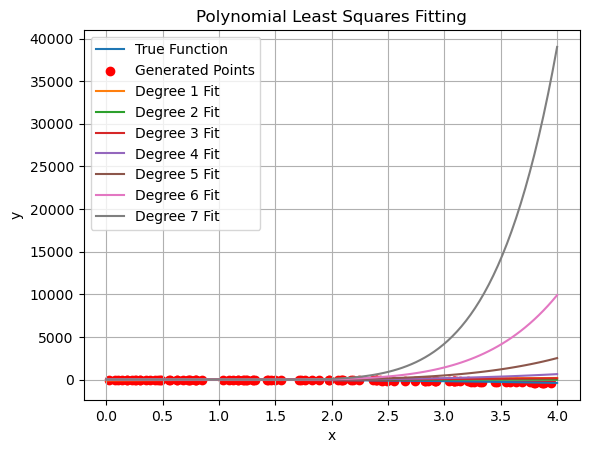

In [26]:
np.random.seed(42)

def true_function(x):
    return 0.5 * x**4 - 7.1 * x**3 - 4.2 * x**2 + 2

x_points = np.random.uniform(0, 4, 100)
y_points = true_function(x_points) + np.random.normal(0, 2, 100) # with some noise

x_values = np.linspace(0, 4, 100)
plt.plot(x_values, true_function(x_values), label='True Function')
plt.scatter(x_points, y_points, color='red', label='Generated Points')

for degree in range(1, 8):
    coefficients = polynomial_least_squares(x_points, y_points, degree)
    fitted_function = np.poly1d(coefficients)
    plt.plot(x_values, fitted_function(x_values), label=f'Degree {degree} Fit')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Least Squares Fitting')
plt.legend()
plt.grid(True)
plt.show()

# after some point, higher degrees begin to pass further to the data


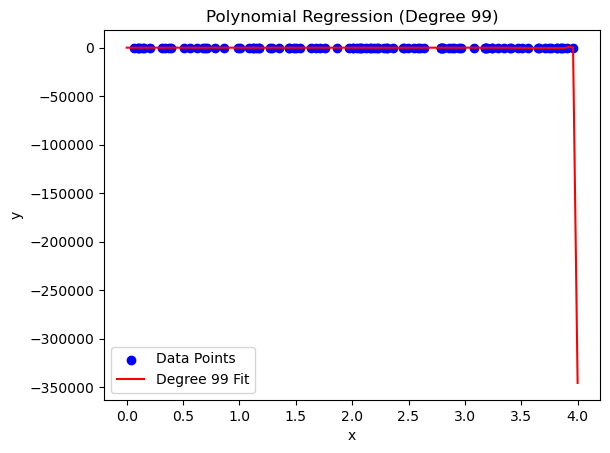

In [27]:
x = np.random.uniform(0, 4, 100)
u = np.random.normal(0, 1, 100)

def true_function(x, u):
    return 0.5 * x**4 - 7.1 * x**3 - 4.2 * x**2 + 2 + u

y = true_function(x, u)

poly_features = PolynomialFeatures(degree=99)
X_poly = poly_features.fit_transform(x[:, np.newaxis])
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

x_values = np.linspace(0, 4, 100)
X_values_poly = poly_features.transform(x_values[:, np.newaxis])
y_pred = lin_reg.predict(X_values_poly)
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_values, y_pred, color='red', label='Degree 99 Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression (Degree 99)')
plt.legend()
plt.show()

C:\Users\beray\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.666e+02, tolerance: 1.347e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\beray\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e+03, tolerance: 1.347e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\beray\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.729e+03, toleranc

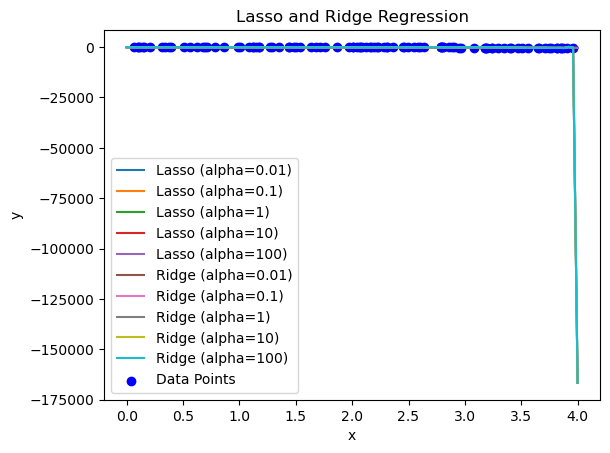

In [28]:
alphas = [0.01, 0.1, 1, 10, 100]
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_poly, y)
    y_pred_lasso = lasso_reg.predict(X_values_poly)
    plt.plot(x_values, y_pred_lasso, label=f'Lasso (alpha={alpha})')

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_poly, y)
    y_pred_ridge = ridge_reg.predict(X_values_poly)
    plt.plot(x_values, y_pred_ridge, label=f'Ridge (alpha={alpha})')

plt.scatter(x, y, color='blue', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lasso and Ridge Regression')
plt.legend()
plt.show()

In [3]:
def calculate_distance_matrix(city_distances):
    cities = members_df['City']
    num_cities = len(cities)

    distance_matrix = np.full((num_cities, num_cities), np.inf)
    np.fill_diagonal(distance_matrix, 0)
    
    # update corresponding index in matrix with squared distances
    city_index = {city: i for i, city in enumerate(cities)}
    for city1, city2, distance in city_distances:
        idx1, idx2 = city_index[city1], city_index[city2]
        distance_matrix[idx1, idx2] = distance**2
        distance_matrix[idx2, idx1] = distance**2
    
    # Floyd-Warshall algorithm
    for k in range(num_cities):
        for i in range(num_cities):
            for j in range(num_cities):
                distance_matrix[i, j] = min(distance_matrix[i, j], distance_matrix[i, k] + distance_matrix[k, j])
    
    return distance_matrix, cities

connection_df = pd.read_csv("connections.txt", sep=" ",header=None,names=["From","To","Distance"])
members_df = pd.read_csv("members.txt", sep=" ",header=None,names=["City","Members"])

city_distances = np.array(connection_df)
distance_matrix, cities = calculate_distance_matrix(city_distances)
city_meeting_cost = {}
best_city = ""
best_cost = np.inf

for i in range(len(cities)):
    d = np.dot(distance_matrix[i],members_df['Members'].T) 
    if(d < best_cost):
        best_cost = d
        best_city = cities[i]
        
print(best_city)

Katowice


In [7]:
def find_distances_and_cost(city1, city2):
    cost_city1 = 0
    cost_city2 = 0
    members_city1 = 0
    members_city2 = 0
    
    for i in range(len(cities)):
        if i == city1 or i == city2:
            continue
        if distance_matrix[city1][i] < distance_matrix[city2][i]:
            cost_city1 += distance_matrix[city1][i]
            members_city1 += members_df['Members'][i]
        else:
            cost_city2 += distance_matrix[city2][i]
            members_city2 += members_df['Members'][i]
            
    ratio = members_city1 / (members_city1 + members_city2)
    cost_optimal_point_from_city1 = distance_matrix[city1][city2] * ratio
    cost_optimal_point_from_city2 = distance_matrix[city1][city2] * (1-ratio)
    total_cost = cost_city1 + cost_city2 + cost_optimal_point_from_city1 + cost_optimal_point_from_city2
    return total_cost, ratio

adjacent_cities = []
for from_city, to_city, distance in city_distances:
    adjacent_cities.append((list(cities).index(from_city), list(cities).index(to_city)))
    
costs = {}
for city1, city2 in adjacent_cities:
    costs[(city1, city2)] = find_distances_and_cost(city1, city2)
    
city_1, city_2 = min(costs, key=costs.get)
print(f"Optimal meeting place: {cities[city_1]} - {cities[city_2]} and costs: {costs[(city_1, city_2)][1]}")

Optimal meeting place: Katowice - Warszawa and costs: 0.7086092715231788
